## This notebook is testing the simulation of Spikes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),".."))
sys.path.append(os.path.join(os.getcwd(),"..","code"))
data_path = os.path.join(os.getcwd(),"..",'data')
sys.path.append(data_path)

In [3]:
import filters
import likelihood_functions as lk
import PoissonProcessClasses as PP
import auxiliary_functions as auxfun

In [4]:
# Reloading modules which are in development
import imp
imp.reload(filters)
imp.reload(auxfun)
imp.reload(lk)
imp.reload(PP)

<module 'PoissonProcessClasses' from '/Users/val/MEGAsync/GLM_PythonModules/notebooks/../code/PoissonProcessClasses.py'>

In [5]:
# reading stimulus
Stim = np.array(pd.read_csv(os.path.join(data_path,'Stim.csv'),header = None))
# reading location of spikes
tsp = np.hstack(np.array(pd.read_csv(os.path.join(data_path,'tsp.csv'),header = None)))

In [6]:
Stim = np.array(pd.read_csv('/Users/val/Desktop/code_GLM_v1_Feb2010/myCode/Stim.csv',header = None))
tsp = np.array(pd.read_csv('/Users/val/Desktop/code_GLM_v1_Feb2010/myCode/Stim.csv',header = None))

In [7]:
dt = 0.01
tsp_int = np.ceil((tsp - dt*0.001)/dt)
tsp_int = np.reshape(tsp_int,(tsp_int.shape[0],1))
tsp_int = tsp_int.astype(int)
y = np.array([item in tsp_int for item in np.arange(Stim.shape[0]/dt)+1]).astype(int)

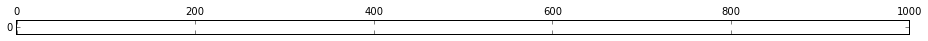

In [8]:
fig, ax = plt.subplots(figsize=(16, 2))
fig = ax.matshow(np.reshape(y[:1000],(1,len(y[:1000]))),cmap = 'Greys',aspect = 15)

In [9]:
# create a stimulus filter
kpeaks = np.array([0,round(20/3)])
pars_k = {'neye':5,'n':5,'kpeaks':kpeaks,'b':3}
K,K_orth,kt_domain = filters.createStimulusBasis(pars_k, nkt = 20) 

In [10]:
# create a post-spike filter
hpeaks = np.array([0.1,2])
pars_h = {'n':5,'hpeaks':hpeaks,'b':.4,'absref':0.}
H,H_orth,ht_domain = filters.createPostSpikeBasis(pars_h,dt)

In [11]:
# Interpolate Post Spike Filter
MSP = auxfun.makeInterpMatrix(len(ht_domain),1)
MSP[0,0] = 0
H_orth = np.dot(MSP,H_orth)

In [12]:
M_k = lk.construct_M_k(Stim,K,dt)

In [13]:
# M_h = lk.construct_M_h(tsp,H_orth,dt,Stim)

Combining $M_k$, $M_h$ and $\textbf{1}$ into one covariate matrix:

In [15]:
# M = np.hstack((M_k,M_h,np.ones((M_h.shape[0],1))))
M = np.hstack((M_k,np.ones((M_k.shape[0],1))))

In [16]:
coeff_k0 = np.array([ 0.061453,0.284916,0.860335,1.256983,0.910615,0.488660,-0.887091,0.097441,0.026607,-0.090147])

coeff_h0 = np.zeros((5,))
coeff_h0 = np.array([-10, -5, 0, 2, -2])

pars0 = np.hstack((coeff_k0,3,coeff_h0))

# pars0 = np.hstack((coeff_k0,3))

In [17]:
random.seed(0)

First check for M_k only.

In [18]:
tsp_sim = auxfun.simSpikes(pars0,M,H,ht_domain,dt = 0.01)

1.8606071110652234
0.184781020769
no spike
1.8606071110652234
0.341979287231
no spike
1.8606071110652234
0.470658274116
no spike
1.8606071110652234
0.652701391562
no spike
1.8606071110652234
1.06662491963
no spike
1.8606071110652234
1.49209018214
no spike
1.8606071110652234
1.60209873986
no spike
1.8606071110652234
1.62235904143
no spike
1.8606071110652234
1.65376246026
no spike
1.8606071110652234
1.98890719202
spike891
1.4186291529717618
4.91744320951
spike969
0.5457131455415928
0.836901717295
spike1111
0.29964231221381415
2.32232617046
spike1817
0.7159547497671507
1.4363393862
spike1934
0.519083186201917
0.555480966126
spike2339
1.531544847594683
0.0748482185332
no spike
1.531544847594683
3.41793131479
spike3321
0.36141864333785023
25.0596636277
spike3944
0.6474034695533025
6.67427457251
spike4021
0.8755856388786918
1.11550203302
spike4100
2.3871944683226607
7.2870759413
spike4738
0.7025651019193324
2.85562465684
spike4856
0.33105989197825525
3.30638386622
spike4973
1.409784933494778

In [19]:
tsp_sim

[9.6799999999999997,
 11.1,
 18.16,
 19.330000000000002,
 23.379999999999999,
 26.57,
 39.43,
 40.200000000000003,
 40.990000000000002,
 47.369999999999997,
 48.550000000000004,
 49.719999999999999,
 53.719999999999999,
 55.030000000000001,
 56.280000000000001,
 57.380000000000003,
 65.650000000000006,
 71.480000000000004,
 76.840000000000003,
 77.820000000000007,
 81.400000000000006,
 82.409999999999997,
 83.400000000000006,
 87.980000000000004,
 89.150000000000006,
 92.829999999999998,
 93.939999999999998,
 97.100000000000009,
 98.200000000000003,
 111.83,
 112.69,
 118.68000000000001,
 119.39,
 120.18000000000001,
 121.31,
 122.3,
 140.75999999999999,
 148.08000000000001,
 149.16,
 150.78999999999999,
 151.47999999999999,
 157.39000000000001,
 158.47999999999999,
 159.39000000000001,
 162.87,
 167.81999999999999,
 169.21000000000001,
 174.55000000000001,
 175.56,
 185.59999999999999,
 186.66,
 189.97999999999999,
 190.78,
 191.66,
 204.40000000000001,
 210.17000000000002,
 211.03999

In [20]:
# create the list of coefficients for each neuron

coeff_list = [np.hstack((coeff_k0,3,coeff_h0,coeff_h0,coeff_h0)),np.hstack((coeff_k0,3,coeff_h0,coeff_h0,coeff_h0)),np.hstack((coeff_k0,3,coeff_h0,coeff_h0,coeff_h0))]

In [21]:
#coeff_list = [np.hstack((coeff_k0,3,coeff_h0))]


In [22]:
random.seed(0)

In [23]:
tsp_sim = auxfun.simSpikesMultiple(coeff_list,M,H,ht_domain,dt = 0.01)

[1.8606071110652234, 1.4186291529717618, 0.5457131455415928]
[ 0.18478102  0.18478102  0.18478102]
no spike
[1.8606071110652234, 1.4186291529717618, 0.5457131455415928]
[ 0.34197929  0.34197929  0.34197929]
no spike
[1.8606071110652234, 1.4186291529717618, 0.5457131455415928]
[ 0.47065827  0.47065827  0.47065827]
no spike
[1.8606071110652234, 1.4186291529717618, 0.5457131455415928]
[ 0.65270139  0.65270139  0.65270139]
spike297
[1.8606071110652234, 1.4186291529717618, 0.29964231221381415]
[ 1.55561922  1.55561922  1.00963742]
spike346
[1.8606071110652234, 1.4186291529717618, 0.7159547497671507]
[ 1.04814238  1.04814238  0.19703509]
no spike
[1.8606071110652234, 1.4186291529717618, 0.7159547497671507]
[ 2.76581502  2.76581502  1.91470773]
spike797
[1.8606071110652234, 0.519083186201917, 0.7159547497671507]
[ 2.72983924  1.3102174   1.87873195]
spike992
[1.8606071110652234, 0.519083186201917, 1.531544847594683]
[ 1.77771659  0.35809474  0.20795433]
no spike
[1.8606071110652234, 0.5190831

In [24]:
len(tsp_sim[1])

355

In [25]:
len(tsp_sim[2])

358

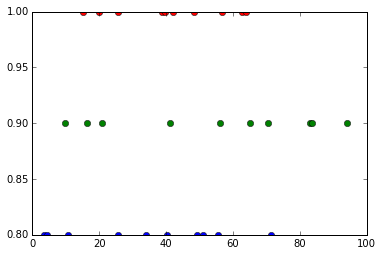

In [26]:
plt.plot(tsp_sim[0][:10],np.ones(len(tsp_sim[0][:10])),'ro')
plt.plot(tsp_sim[1][:10],0.9*np.ones(len(tsp_sim[1][:10])),'go')
plt.plot(tsp_sim[2][:10],0.8*np.ones(len(tsp_sim[2][:10])),'bo')